In [ ]:
# import openai
# from openai import OpenAI
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
import ast

In [ ]:
def load_and_process_city_data():
    # Dictionary to store the processed DataFrames
    city_data = {}

    # List of city filenames and corresponding keys
    city_files = {
        'houston': '5332_houston.csv',
        'chicago': '5259_chicago.csv',
        'la': '9348_la.csv',
        'nyc': '16056_nyc.csv'
    }
    price_mapping = {'$': 1, '$$': 2, '$$$': 3, '$$$$': 4}
    # Process each city file
    for city, file in city_files.items():
        df = pd.read_csv(file)
        df = df.drop(columns=['Unnamed: 0', 'id', 'image_url', 'is_closed', 'attributes'])
        df = df[df['rating'] != 0].reset_index(drop=True)

        # Apply literal_eval to the 'categories' column
        df = literal_eval_category(df)

        # Extract titles from the 'categories' column
        df['category_titles'] = df['categories'].apply(extract_titles)
        df['price'] = df['price'].map(price_mapping)

        city_data[city] = df

    return city_data

def literal_eval_category(df):
    df['categories'] = df['categories'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
    return df

def extract_titles(categories):
    return ', '.join([category['title'] for category in categories])

In [ ]:
city_data = load_and_process_city_data()
houston_list = city_data['houston']
chicago_list = city_data['chicago']
la_list = city_data['la']
nyc_list = city_data['nyc']

In [ ]:
city_dataframes = {
    'NYC': nyc_list,
    'LA': la_list,
    'Chicago': chicago_list,
    'Houston': houston_list
}

# General Analysis

## Distribution of rating with frequency in each city

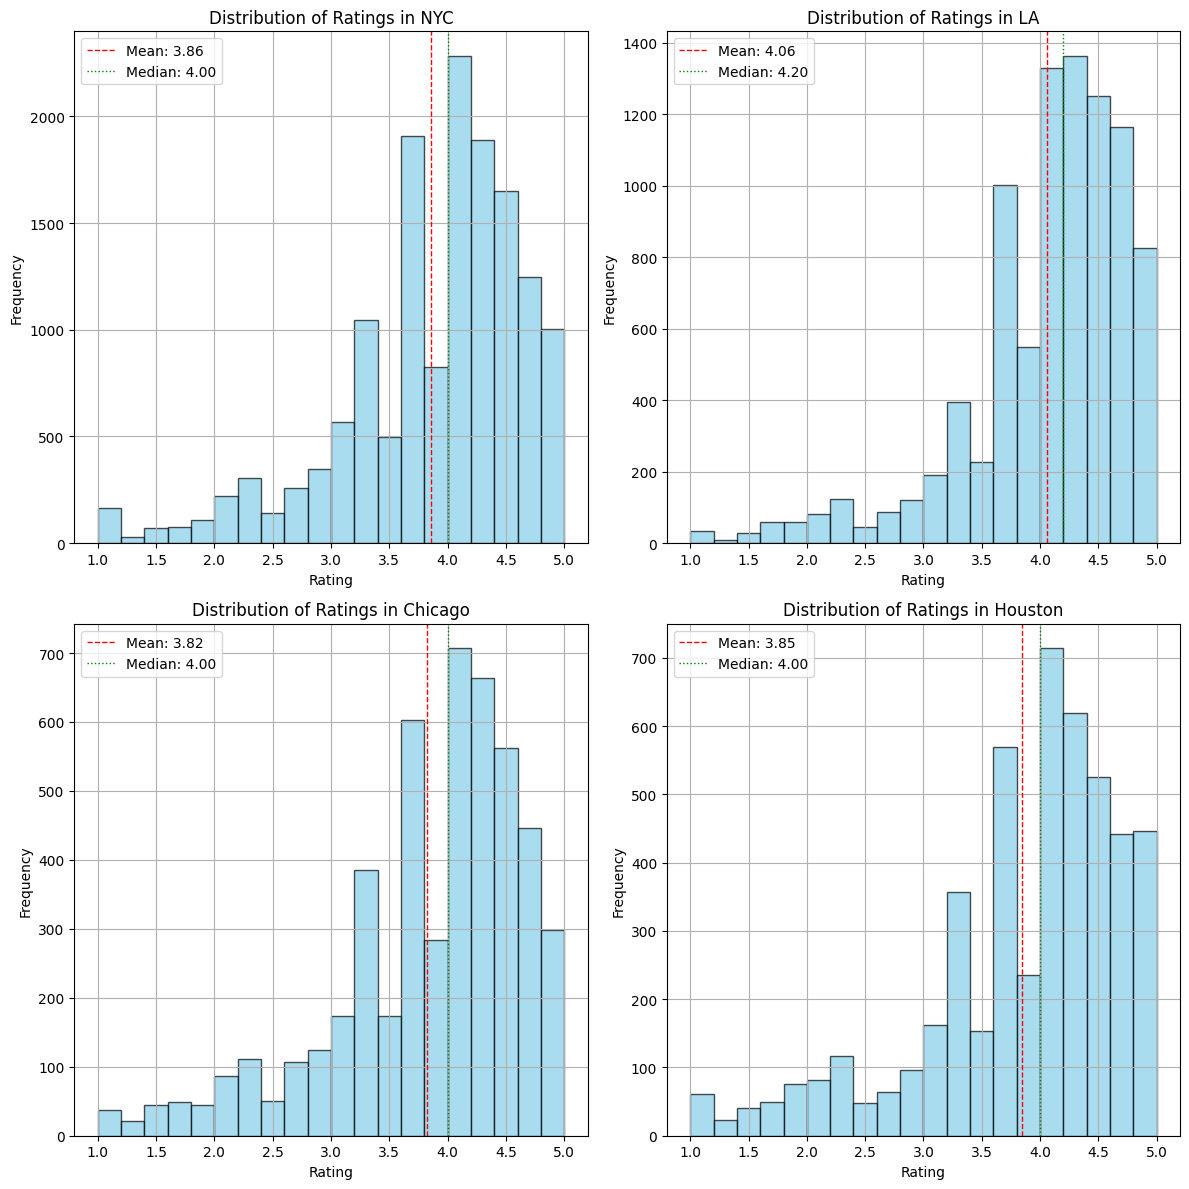

In [ ]:
plt.figure(figsize=(12, 12))  # Adjust the size of the plot

for i, (city, df) in enumerate(city_dataframes.items(), 1):
    plt.subplot(2, len(city_dataframes)//2, i)
    plt.hist(df['rating'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)

    mean_rating = df['rating'].mean()
    median_rating = df['rating'].median()

    plt.axvline(mean_rating, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_rating:.2f}')
    plt.axvline(median_rating, color='green', linestyle='dotted', linewidth=1, label=f'Median: {median_rating:.2f}')

    plt.title(f'Distribution of Ratings in {city}')
    plt.xlabel('Rating')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True)

plt.tight_layout()  # Adjust subplots to fit in the figure area
plt.show()


# To Broad Category

In [ ]:
# Define a basic broad categories
category_mapping = {'Breakfast & Brunch': 'Breakfast & Brunch',
 'Cafes': 'Coffee & Tea',
 'New American': 'American',
 'Cocktail Bars': 'Bars',
 'Seafood': 'Seafood',
 'Mexican': 'Mexican',
 'Bakeries': 'Bakeries & Desserts',
 'Italian': 'Italian',
 'Pizza': 'Italian',
 'American (Traditional)': 'American',
 'Sushi Bars': 'Japanese',
 'French': 'French',
 'Burgers': 'Fast Food',
 'Asian Fusion': 'Asian Fusion',
 'Desserts': 'Bakeries & Desserts',
 'Chinese': 'Chinese',
 'Bars': 'Bars',
 'Steakhouses': 'Steakhouses',
 'Japanese': 'Japanese',
 'Vietnamese': 'Asian Fusion',
 'Mediterranean': 'Mediterranean',
 'Korean': 'Asian Fusion',
 'Vegetarian': 'Vegetarian',
 'Indian': 'Asian Fusion',
 'Thai': 'Asian Fusion',
 'Fast Food': 'Fast Food',
 'Wine Bars': 'Bars',
 'Southern': 'American',
 'Middle Eastern': 'Middle Eastern',
 'Barbeque': 'Barbeque',
 'Gastropubs': 'Bars',
 'Food Trucks': 'Fast Food',
 'Greek': 'Mediterranean',
 'Sandwiches': 'Fast Food',
 'Tapas/Small Plates': 'Spanish',
 'Delis': 'Fast Food',
 'Gluten-Free': 'Specialty',
 'Juice Bars & Smoothies': 'Specialty',
 'Halal': 'Middle Eastern',
 'Vegan': 'Vegetarian',
 'Spanish': 'Spanish',
 'Salad': 'Specialty',
 'Pubs': 'Bars',
 'Latin American': 'Latin American',
 'Dim Sum': 'Chinese',
 'Persian/Iranian': 'Middle Eastern',
 'German': 'European',
 'Tacos': 'Mexican',
 'Southern/Soul Food': 'American',
 'Hawaiian': 'Polynesian',
 'Ramen': 'Japanese',
 'Taiwanese': 'Asian Fusion',
 'Hot Dogs': 'Fast Food',
 'Noodles': 'Asian Fusion',
 'Brazilian': 'Latin American',
 'Irish': 'European',
 'Chicken Wings': 'Fast Food',
 'Argentine': 'Latin American',
 'Eastern European': 'European',
 'Ethiopian': 'African',
 'African': 'African',
 'Modern European': 'European',
 'Himalayan/Nepalese': 'Asian Fusion',
 'Turkish': 'Middle Eastern',
 'Caribbean': 'Latin American',
 'Cuban': 'Latin American',
 'Pan Asian': 'Asian Fusion',
 'Lebanese': 'Middle Eastern',
 'Live/Raw Food': 'Specialty',
 'Game Meat': 'Specialty',
 'Tuscan': 'European',
 'Scandinavian': 'European',
 'Arabic': 'Middle Eastern',
 'Custom Cakes': 'Bakeries & Desserts',
 'Hookah Bars': 'Bars',
 'Austrian': 'European',
 'Burmese': 'Asian Fuision',
 'Belgian': 'European',
 'Basque': 'European',
 'Piano Bars': 'Bars',
 'Gay Bars': 'Bars',
 'Brewpubs': 'Bars',
 'Cheesesteaks': 'Fast Food',
 'Patisserie/Cake Shop': 'Bakeries & Desserts',
 'Dance Clubs': 'Bars',
 'Breweries': 'Bars',
 'Beverage Store': 'Bars',
 'Afghan': 'Middle Eastern',
 'Macarons': 'Bakeries & Desserts',
 'Cambodian': 'Asian Fusion',
 'Shaved Ice': 'Bakeries & Desserts',
 'Egyptian': 'Middle Eastern',
 'Singaporean': 'Asian Fuision',
 'Hungarian': 'European',
 'Fondue': 'European',
 'Gelato': 'Bakeries & Desserts',
 'South African': 'African',
 'Cupcakes': 'Bakeries & Desserts',
 'Pretzels': 'Bakeries & Desserts',
 'Nightlife': 'Bars',
 'Indonesian': 'Asian Fuision',
 'Czech': 'European',
 'Vermouth Bars': 'Bars',
 'Sardinian': 'Mediterranean',
 'Poutineries': 'Fast Food',
 'Pancakes': 'Bakeries & Desserts',
 'Syrian': 'Middle Eastern',
 'Slovakian': 'European',
 'Distilleries': 'Bars',
 'Honduran': 'Latin American',
 'Sri Lankan': 'Asian Fuision',
 'Hainan': 'Chinese',
 'Fruits & Veggies': 'Vegetarian',
 'Piadina': 'European',
 'Somali': 'African',
 'Eritrean': 'African',
 'Kebab': 'Fast Food',
 'British': 'European',
 'Peruvian': 'Latin American',
 'Sports Bars': 'Bars',
 'Szechuan': 'Chinese',
 'Acai Bowls': 'Bakeries & Desserts',
 'Senegalese': 'African',
 'Beer Gardens': 'Bars',
 'Tex-Mex': 'American',
 'Bangladeshi': 'Asian Fuision',
 'Cantonese': 'Asian Fuision',
 'Street Vendors': 'Fast Food',
 'Food Stands': 'Fast Food',
 'Moroccan': 'Mediterranean',
 'Salvadoran': 'Latin American',
 'Tapas Bars': 'Spanish',
 'Speakeasies': 'Bars',
 'Australian': 'Australian',
 'Izakaya': 'Japanese',
 'Pasta Shops': 'Italian',
 'Georgian': 'European',
 'Beer Bar': 'Bars',
 'Hong Kong Style Cafe': 'Coffee & Tea',
 'Specialty Food': 'Specialty',
 'Uzbek': 'Asian Fusion',
 'Empanadas': 'Spanish',
 'Tiki Bars': 'Bars',
 'Trinidadian': 'Latin American',
 'Tea Rooms': 'Coffee & Tea',
 'Bagels': 'Bakeries & Desserts',
 'Venezuelan': 'Latin American',
 'Coffee Roasteries': 'Coffee & Tea',
 'Japanese Curry': 'Japanese',
 'Cajun/Creole': 'American',
 'Soul Food': 'American',
 'Kosher': 'Specialty',
 'Poke': 'Japanese',
 'Cheese Shops': 'Specialty',
 'Colombian': 'Latin American',
 'Food Court': 'Fast Food',
 'Russian': 'European',
 'Waffles': 'Bakeries & Desserts',
 'Chicken Shop': 'Fast Food',
 'Donuts': 'Bakeries & Desserts',
 'Seafood Markets': 'Seafood',
 'Irish Pub': 'Bars',
 'New Mexican Cuisine': 'Mexican',
 'Filipino': 'Asian Fusion',
 'Malaysian': 'Asian Fusion',
 'Puerto Rican': 'Latin American',
 'Haitian': 'Latin American',
 'Dominican': 'Latin American',
 'Bubble Tea': 'Coffee & Tea',
 'Beer, Wine & Spirits': 'Bars',
 'Brasseries': 'French',
 'Portuguese': 'European',
 'Shanghainese': 'Chinese',
 'Falafel': 'Middle Eastern',
 'Themed Cafes': 'Coffee & Tea',
 'Polish': 'European',
 'Cafeteria': 'Coffee & Tea',
 'Ice Cream & Frozen Yogurt': 'Bakeries & Desserts',
 'Hot Pot': 'Chinese',
 'Whiskey Bars': 'Bars',
 'Fish & Chips': 'European',
 'Pakistani': 'Asian Fusion',
 'Sicilian': 'Italian',
 'Dive Bars': 'Bars',
 'Creperies': 'Bakeries & Desserts',
 'Ukrainian': 'European',
 'Wraps': 'Fast Food',
 'Buffets': 'Specialty',
 'Coffee & Tea': 'Coffee & Tea',
 'American': 'American',
 'Iberian': 'Spanish',
 'Armenian': 'European',
 'Teppanyaki': 'Japanese',
 'Nicaraguan': 'Latin American',
 'Calabrian': 'Italian',
 'Mongolian': 'Asian Fusion',
 'Malaysian Food': 'Asian Fusion',
 'Fuzhou': 'Chinese',
 'Polynesian': 'Polynesian',
 'Conveyor Belt Sushi': 'Japanese',
 'Cideries': 'Bars',
 'Bulgarian': 'European',
 'Meaderies': 'Bars',
 'Internet Cafes': 'Coffee & Tea',
 'Champagne Bars': 'Bars',
 'Catalan': 'Mediterranean',
 'Country Clubs': 'Bars',
 'Drive-Thru Bars': 'Bars',
 'Bar Crawl': 'Bars'}

In [ ]:
drop_special = ['Performing Arts',
 'Dinner Theater',
 'Party & Event Planning',
 'Candy Stores',
 'Cooking Classes',
 'Public Markets',
 'Smokehouse',
 'Food',
 'Organic Stores',
 'Florists',
 'Gift Shops',
 'Art Galleries',
 'Cinema',
 'Imported Food',
 'Arcades',
 'Wedding Planning',
 'Nurseries & Gardening',
 'Bookstores',
 'Supper Clubs',
 'Do-It-Yourself Food',
 'Pop-up Shops',
 'Pool Halls',
 'Cultural Center',
 'Personal Chefs',
 'Vinyl Records',
 'Boating',
 'Health Markets',
 'Olive Oil',
 'Furniture Stores',
 'Pet Adoption',
 'Toy Stores',
 'Commercial Real Estate',
 'Souvenir Shops',
 'Books, Mags, Music & Video',
 'Community Service/Non-Profit',
 'Eatertainment',
 'Arcades',
 'Kids Activities',
 'Farmers Market',
 'Wine Tasting Room',
 'Social Clubs',
 'Accessories',
 'Indoor Playcentre',
 'Wineries',
 'Festivals',
 'Honey',
 'Karaoke',
 'Caterers',
 'Pop-Up Restaurants',
 'Lounges',
 'Butcher',
 'Grocery',
 'Diners',
 'Soup',
 'Comfort Food',
 'Jazz & Blues',
 'Food Delivery Services',
 'Convenience Stores',
 'Meat Shops',
 'Music Venues',
 'International Grocery',
 'Venues & Event Spaces',
 'Restaurants',
 'Pick Your Own Farms',
 'Campgrounds',
 'Boat Charters',
 'Shopping Centers',
 'Surf Shop',
 'Skate Parks',
 'Discount Store',
 'Guest Houses',
 'Yoga',
 'Pharmacy',
 'Event Planning & Services',
 'Sports Wear',
 'Stadiums & Arenas',
 'Wholesalers',
 'Animal Shelters',
 'Newspapers & Magazines',
 'Pick Your Own Farms',
 'Campgrounds',
 'Boat Charters',
 'Shopping Centers',
 'Surf Shop',
 'Skate Parks',
 'Discount Store',
 'Guest Houses',
 'Yoga',
 'Pharmacy',
 'Event Planning & Services',
 'Sports Wear',
 'Stadiums & Arenas',
 'Wholesalers',
 'Animal Shelters',
 'Newspapers & Magazines',
 "Men's Clothing",
 'Bowling',
 'Bike Rentals',
 'Buddhist Temples',
 'Painters',
 'Restaurant Supplies',
 'Local Flavor',
 'Refinishing Services',
 'Art Museums',
 'Swimming Pools',
 'Wine Tasting Classes',
 'Pressure Washers',
 'Wholesale Stores',
 'Laotian',
 'Chocolatiers & Shops',
 'Cannabis Dispensaries',
 'Food Banks',
 'Pet Stores',
 'Cannabis Collective',
 'Food Tours',
 'Laundromat',
 'Party Supplies',
 'Acupuncture',
 'Parking',
 'Mini Golf',
 'Antiques',
 'Comedy Clubs',
 'Tobacco Shops',
 'Airport Lounges',
 'Magicians',
 'Physical Therapy',
 'Home Decor',
 'Playgrounds',
 'Music & DVDs',
 'Tabletop Games',
 'Shared Office Spaces',
 'Health Coach',
 'Skin Care',
 'Boxing',
 'Used, Vintage & Consignment',
 'Cabaret',
 'Dog Parks']

In [ ]:
drop_special_sorted = sorted(drop_special)
# drop_special_sorted

### NYC

In [ ]:
nyc_list['categories'] = nyc_list['categories'].apply(lambda x: [category['title'] for category in x])

In [ ]:
for index, row in nyc_list.iterrows():
  categories = row['categories']
  new_categories = [category for category in categories if category not in drop_special]
  nyc_list.at[index, 'categories'] = new_categories

In [ ]:
nyc_list['broad_category'] = nyc_list['categories'].apply(lambda x: [category_mapping.get(category, category) for category in x])

In [ ]:
# Create a set to hold categories that are not in the mapping dictionary
missing_categories = set()

# Identify categories that are not in the mapping dictionary
nyc_list['categories'].apply(lambda x: [missing_categories.add(category) for category in x if category not in category_mapping])

# Convert the set to a list
missing_categories_list = list(missing_categories)

# Display the missing categories
missing_categories_list

['Hotels', 'Art Classes', 'Gas Stations']

In [ ]:
# category_mapping.update({
#     'Armenian':'European',
#     'Iberian':'Spanish',
# })

In [ ]:
drop_special.extend(['Hotels', 'Art Classes', 'Gas Stations'])

In [ ]:
for index, row in nyc_list.iterrows():
  categories = row['categories']
  new_categories = [category for category in categories if category not in drop_special]
  nyc_list.at[index, 'categories'] = new_categories

In [ ]:
nyc_list['broad_category'] = nyc_list['categories'].apply(lambda x: [category_mapping.get(category, category) for category in x])

In [ ]:
# (nyc_list['broad_category'].explode().value_counts() < 5)['broad_category'].to_list()
# Get the value counts for each category
value_counts = nyc_list['broad_category'].explode().value_counts()

# Filter for categories with fewer than 5 occurrences
categories_to_list = value_counts[value_counts < 5].index.to_list()

# Output the list of these categories
categories_to_list

[]

In [ ]:
broad_category = nyc_list['broad_category'].explode()
broad_category.value_counts()

,count
broad_category,
Fast Food,4684
Bars,2650
Italian,2517
Asian Fusion,2153
American,1896
Latin American,1590
Chinese,1530
Coffee & Tea,1443
Japanese,1432


In [ ]:
special_df = pd.DataFrame()
for index, row in nyc_list.iterrows():
  categories = row['categories']
  for category in categories:
    if category in drop_special_sorted:
      special_df_temp = pd.DataFrame(row).T
      special_df = pd.concat([special_df, special_df_temp])

In [ ]:
special_df

""


### LA

In [ ]:
la_list['categories'] = la_list['categories'].apply(lambda x: [category['title'] for category in x])

In [ ]:
for index, row in la_list.iterrows():
  categories = row['categories']
  new_categories = [category for category in categories if category not in drop_special]
  la_list.at[index, 'categories'] = new_categories

In [ ]:
la_list['broad_category'] = la_list['categories'].apply(lambda x: [category_mapping.get(category, category) for category in x])

In [ ]:
# Create a set to hold categories that are not in the mapping dictionary
missing_categories = set()

# Identify categories that are not in the mapping dictionary
la_list['categories'].apply(lambda x: [missing_categories.add(category) for category in x if category not in category_mapping])

# Convert the set to a list
missing_categories_list = list(missing_categories)

# Display the missing categories
missing_categories_list

['Axe Throwing', 'Pet Sitting', 'Pet Training', 'Popcorn Shops']

In [ ]:
category_mapping.update({
    'Popcorn Shops': 'Bakeries & Desserts'
})

In [ ]:
drop_special.extend(['Axe Throwing', 'Pet Sitting', 'Pet Training'])

In [ ]:
for index, row in la_list.iterrows():
  categories = row['categories']
  new_categories = [category for category in categories if category not in drop_special]
  la_list.at[index, 'categories'] = new_categories

In [ ]:
la_list['broad_category'] = la_list['categories'].apply(lambda x: [category_mapping.get(category, category) for category in x])

In [ ]:
# (nyc_list['broad_category'].explode().value_counts() < 5)['broad_category'].to_list()
# Get the value counts for each category
value_counts = la_list['broad_category'].explode().value_counts()

# Filter for categories with fewer than 5 occurrences
categories_to_list = value_counts[value_counts < 5].index.to_list()

# Output the list of these categories
categories_to_list

['Australian']

In [ ]:
broad_category = la_list['broad_category'].explode()
broad_category.value_counts()

,count
broad_category,
Fast Food,3645
Mexican,1668
Asian Fusion,1543
American,1244
Japanese,1195
Bars,1192
Italian,1135
Breakfast & Brunch,1071
Coffee & Tea,866


### Chicago

In [ ]:
chicago_list['categories'] = chicago_list['categories'].apply(lambda x: [category['title'] for category in x])

In [ ]:
for index, row in chicago_list.iterrows():
  categories = row['categories']
  new_categories = [category for category in categories if category not in drop_special]
  chicago_list.at[index, 'categories'] = new_categories

In [ ]:
chicago_list['broad_category'] = chicago_list['categories'].apply(lambda x: [category_mapping.get(category, category) for category in x])

In [ ]:
# Create a set to hold categories that are not in the mapping dictionary
missing_categories = set()

# Identify categories that are not in the mapping dictionary
chicago_list['categories'].apply(lambda x: [missing_categories.add(category) for category in x if category not in category_mapping])

# Convert the set to a list
missing_categories_list = list(missing_categories)

# Display the missing categories
missing_categories_list

[]

In [ ]:
# category_mapping.update({
#     'Cideries':'Bars',
#     'Bulgarian':'European',
#     'Meaderies':'Bars',
#     'Internet Cafes':'Coffee & Tea'
# })

In [ ]:
# drop_special.extend(['Parking','Mini Golf','Antiques','Comedy Clubs','Tobacco Shops','Airport Lounges',
#                      'Magicians','Physical Therapy','Home Decor','Playgrounds','Music & DVDs','Tabletop Games',
#                      'Shared Office Spaces','Health Coach','Skin Care','Boxing','Used, Vintage & Consignment','Cabaret'])

In [ ]:
for index, row in chicago_list.iterrows():
  categories = row['categories']
  new_categories = [category for category in categories if category not in drop_special]
  chicago_list.at[index, 'categories'] = new_categories

In [ ]:
chicago_list['broad_category'] = chicago_list['categories'].apply(lambda x: [category_mapping.get(category, category) for category in x])

In [ ]:
broad_category = chicago_list['broad_category'].explode()
broad_category.value_counts()

,count
broad_category,
Fast Food,2094
Mexican,905
American,897
Bars,820
Italian,744
Asian Fusion,571
Breakfast & Brunch,522
Coffee & Tea,455
Seafood,374


### Houston

In [ ]:
houston_list['categories'] = houston_list['categories'].apply(lambda x: [category['title'] for category in x])

In [ ]:
for index, row in houston_list.iterrows():
  categories = row['categories']
  new_categories = [category for category in categories if category not in drop_special]
  houston_list.at[index, 'categories'] = new_categories

In [ ]:
houston_list['broad_category'] = houston_list['categories'].apply(lambda x: [category_mapping.get(category, category) for category in x])

In [ ]:
# Create a set to hold categories that are not in the mapping dictionary
missing_categories = set()

# Identify categories that are not in the mapping dictionary
houston_list['categories'].apply(lambda x: [missing_categories.add(category) for category in x if category not in category_mapping])

# Convert the set to a list
missing_categories_list = list(missing_categories)

# Display the missing categories
missing_categories_list

['Cooking Schools',
 'Tattoo',
 'Shaved Snow',
 'Petting Zoos',
 'Grill Services',
 'Ranches',
 'Pickleball',
 'Golf']

In [ ]:
# category_mapping.update({
#     'Champagne Bars':'Bars',
#     'Catalan':'Mediterranean',
#     'Country Clubs':'Bars',
#     'Drive-Thru Bars':'Bars',
#     'Bar Crawl':'Bars'
# })

In [ ]:
drop_special.extend(['Cooking Schools',
 'Tattoo',
 'Shaved Snow',
 'Petting Zoos',
 'Grill Services',
 'Ranches',
 'Pickleball',
 'Golf'])

In [ ]:
for index, row in houston_list.iterrows():
  categories = row['categories']
  new_categories = [category for category in categories if category not in drop_special]
  houston_list.at[index, 'categories'] = new_categories

In [ ]:
houston_list['broad_category'] = houston_list['categories'].apply(lambda x: [category_mapping.get(category, category) for category in x])

In [ ]:
broad_category = houston_list['broad_category'].explode()
broad_category.value_counts()

,count
broad_category,
Fast Food,2285
American,1234
Mexican,1094
Bars,636
Asian Fusion,633
Breakfast & Brunch,526
Seafood,521
Italian,439
Japanese,388


In [ ]:
houston_list.to_csv('houston_list.csv', index=False)

# Category Cluster

In [ ]:
def coordinates_convert(data):
  # Extracting latitude and longitude from the 'coordinates' column and adding them as separate columns
  data['latitude'] = data['coordinates'].apply(lambda x: eval(x)['latitude'])
  data['longitude'] = data['coordinates'].apply(lambda x: eval(x)['longitude'])

  # Converting to float (even though they should already be floats)
  data['latitude'] = data['latitude'].astype(float)
  data['longitude'] = data['longitude'].astype(float)

  # Dropping the original 'coordinates' column as it's no longer needed
  data = data.drop(columns=['coordinates'])
  return data

In [ ]:
city_dataframes = {
    'NYC': nyc_list,
    'LA': la_list,
    'Chicago': chicago_list,
    'Houston': houston_list
}

In [ ]:
for city, df in city_dataframes.items():
  df = coordinates_convert(df)
  city_dataframes[city] = df

In [ ]:
boundaries = {
    'NYC': ['NYC_Borough.geojson','NYC_Neighborhoods.geojson'],
    'LA': ['LA_Community.geojson','LA_Neighborhoods.geojson'],
    'Chicago': ['Chicago_Neighborhoods.geojson'],
    'Houston': ['Houston_Neighborhoods.geojson']
}

# With or without price

In [ ]:
# Function to remove redundant items in 'broad_category' column
def remove_redundant_categories(categories):
    return list(set(categories))
# Convert the list back to string format for easier viewing
houston_list['broad_category'] = houston_list['broad_category'].apply(str)
# Apply the function to the 'broad_category' column
houston_list['broad_category'] = houston_list['broad_category'].apply(eval).apply(remove_redundant_categories)

In [ ]:
# Convert 'broad_category' back to a list format for easier processing
# houston_list['broad_category'] = houston_list['broad_category'].apply(eval)

# Explode the 'broad_category' column so that each category has its own row
exploded_df = houston_list.explode('broad_category')

# Now, let's group by 'broad_category' and calculate the counts, average rating, and average pricing
category_summary = exploded_df.groupby('broad_category').agg(
    count=('broad_category', 'size'),
    average_rating=('rating', 'mean'),
    average_price=('price', 'mean')
).reset_index()

In [ ]:
def broad_category(dataframe):
    # Ensure 'broad_category' column is in list format and remove redundancies
    dataframe['broad_category'] = dataframe['broad_category'].apply(
        lambda x: eval(x) if isinstance(x, str) else x
    )
    dataframe['broad_category'] = dataframe['broad_category'].apply(remove_redundant_categories)

    # Explode the 'broad_category' column so that each category has its own row
    exploded_df = dataframe.explode('broad_category')

    # Group by 'broad_category' and calculate the counts, average rating, and average pricing
    broad_category_df = exploded_df.groupby('broad_category').agg(
        count=('broad_category', 'size'),
        average_rating=('rating', 'mean'),
        average_price=('price', 'mean')
    ).reset_index()

    return broad_category_df

In [ ]:
value_isna = pd.concat([nyc_list.isna().sum(),
                        la_list.isna().sum(),
                        chicago_list.isna().sum(),
                        houston_list.isna().sum()], axis=1,
                       keys=['nyc', 'la', 'chicago', 'houston'])
value_isna

,nyc,la,chicago,houston
alias,0,0,0,0
name,0,0,0,0
url,0,0,0,0
review_count,0,0,0,0
categories,0,0,0,0
rating,0,0,0,0
coordinates,0,0,0,0
transactions,0,0,0,0
location,0,0,0,0
phone,1138,675,232,277


In [ ]:
nyc_list_cleaned = nyc_list.dropna(subset=['price'])
la_list_cleaned = la_list.dropna(subset=['price'])
chicago_list_cleaned = chicago_list.dropna(subset=['price'])
houston_list_cleaned = houston_list.dropna(subset=['price'])

In [ ]:
nyc_withnaprice = broad_category(nyc_list.copy()).sort_values(by='count', ascending=False)
la_withnaprice = broad_category(la_list.copy()).sort_values(by='count', ascending=False)
chicago_withnaprice = broad_category(chicago_list.copy()).sort_values(by='count', ascending=False)
houston_withnaprice = broad_category(houston_list.copy()).sort_values(by='count', ascending=False)

In [ ]:
nyc_cleaned = broad_category(nyc_list_cleaned.copy()).sort_values(by='count', ascending=False)
la_cleaned = broad_category(la_list_cleaned.copy()).sort_values(by='count', ascending=False)
chicago_cleaned = broad_category(chicago_list_cleaned.copy()).sort_values(by='count', ascending=False)
houston_cleaned = broad_category(houston_list_cleaned.copy()).sort_values(by='count', ascending=False)

In [ ]:
nyc_cleaned

,broad_category,count,average_rating,average_price
12,Fast Food,1866,3.512487,1.529475
7,Bars,1540,3.936039,2.172078
14,Italian,1292,3.755263,1.811146
1,American,1260,3.736746,2.056349
3,Asian Fusion,1125,3.988622,1.953778
9,Chinese,904,3.650664,1.601770
16,Latin American,828,3.608454,1.718599
8,Breakfast & Brunch,827,3.875816,1.857316
10,Coffee & Tea,713,3.825806,1.545582
15,Japanese,601,3.937770,2.094842


In [ ]:
la_cleaned

,broad_category,count,average_rating,average_price
12,Fast Food,1876,3.765832,1.573028
18,Mexican,1117,3.886661,1.504029
3,Asian Fusion,1048,4.114504,1.949427
1,American,987,3.911854,2.074975
8,Breakfast & Brunch,868,4.011866,1.919355
7,Bars,850,4.020000,2.260000
14,Italian,657,3.921157,1.969559
15,Japanese,647,4.113910,2.210201
10,Coffee & Tea,565,3.994159,1.646018
23,Specialty,528,4.064773,1.910985


In [ ]:
chicago_cleaned

,broad_category,count,average_rating,average_price
11,Fast Food,922,3.449132,1.442516
1,American,633,3.777093,1.909953
6,Bars,532,3.881015,2.067669
17,Mexican,526,3.752662,1.437262
13,Italian,436,3.706881,1.839450
7,Breakfast & Brunch,385,3.931169,1.753247
3,Asian Fusion,305,4.043279,1.859016
9,Coffee & Tea,249,3.825301,1.522088
20,Seafood,214,3.673832,2.056075
4,Bakeries & Desserts,198,4.002525,1.696970


In [ ]:
houston_withnaprice

,broad_category,count,average_rating,average_price
11,Fast Food,1616,3.609282,1.384532
1,American,1113,3.812848,1.915493
17,Mexican,1089,3.907713,1.414931
6,Bars,577,3.952860,2.080519
3,Asian Fusion,528,4.137879,1.809249
7,Breakfast & Brunch,526,3.930418,1.682320
20,Seafood,519,3.844894,1.953216
13,Italian,367,3.610627,1.762646
22,Specialty,319,3.866458,1.686486
4,Bakeries & Desserts,309,4.040777,1.508671


In [ ]:
houston_cleaned

,broad_category,count,average_rating,average_price
11,Fast Food,918,3.292919,1.384532
1,American,781,3.735211,1.915493
17,Mexican,576,3.670833,1.414931
6,Bars,385,3.837922,2.080519
7,Breakfast & Brunch,362,3.836464,1.682320
3,Asian Fusion,346,4.059827,1.809249
20,Seafood,342,3.806433,1.953216
13,Italian,257,3.490661,1.762646
9,Coffee & Tea,207,3.631884,1.483092
8,Chinese,189,3.673016,1.624339


# Broad Category vs Average Rating

In [ ]:
def plot_category(dataframe):
    plt.figure(figsize=(14, 10))

    # Sort the dataframe by 'count' for better visual representation
    dataframe = dataframe.sort_values('count', ascending=True)

    # Create the horizontal bar plot
    bars = plt.barh(dataframe['broad_category'], dataframe['count'], color='skyblue', edgecolor='black')

    # Add count labels to the right of each bar
    for bar in bars:
        plt.text(
            bar.get_width(),             # X coordinate for the text (right of the bar)
            bar.get_y() + bar.get_height() / 2,  # Y coordinate (middle of the bar)
            f'{int(bar.get_width())}',   # The label (integer value of the count)
            va='center',                 # Vertical alignment
            ha='left',                   # Horizontal alignment (to the right of the bar)
            fontsize=10                  # Font size for the labels
        )

    # Labels and title
    plt.xlabel('Count')
    plt.ylabel('Broad Category')
    plt.title('Amount of Broad Restaurant Categories')

    plt.show()

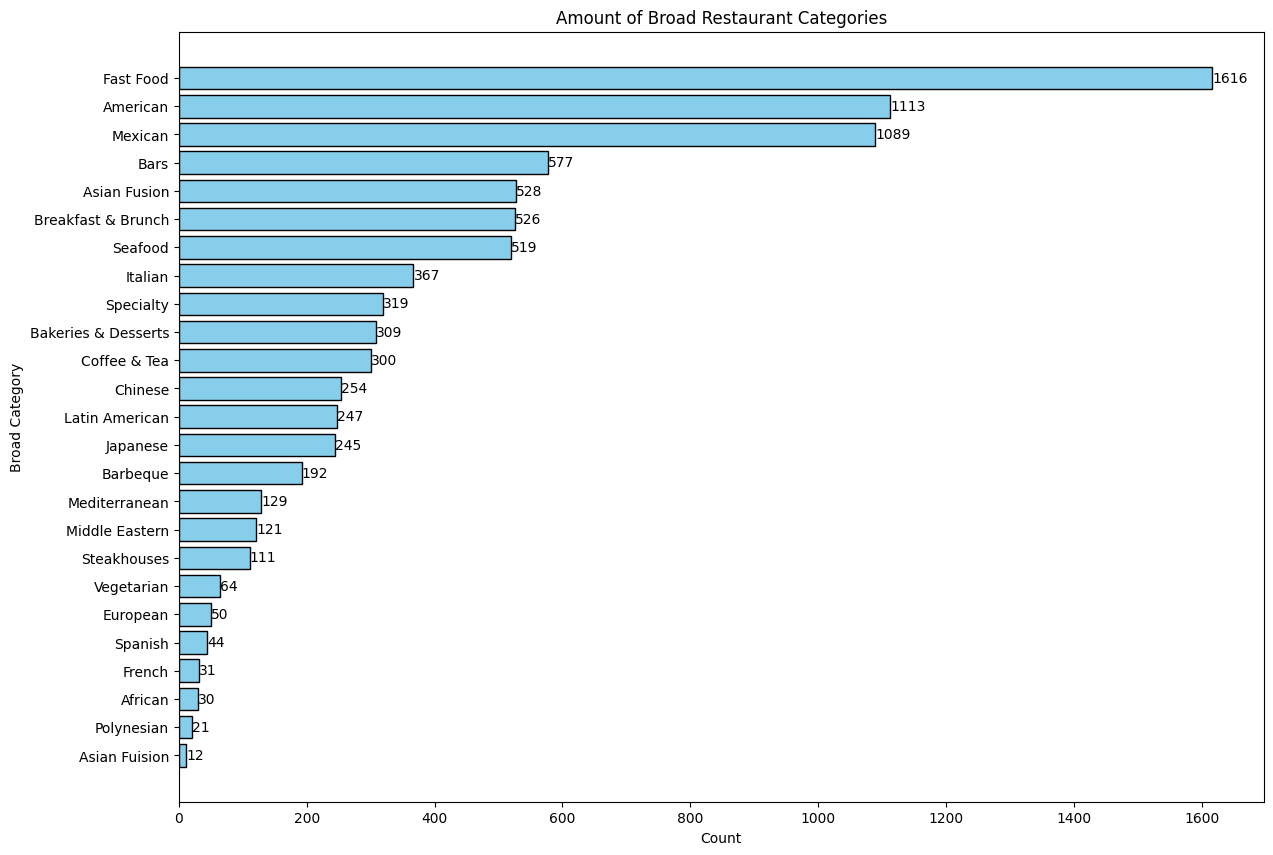

In [ ]:
plot_category(houston_withnaprice)

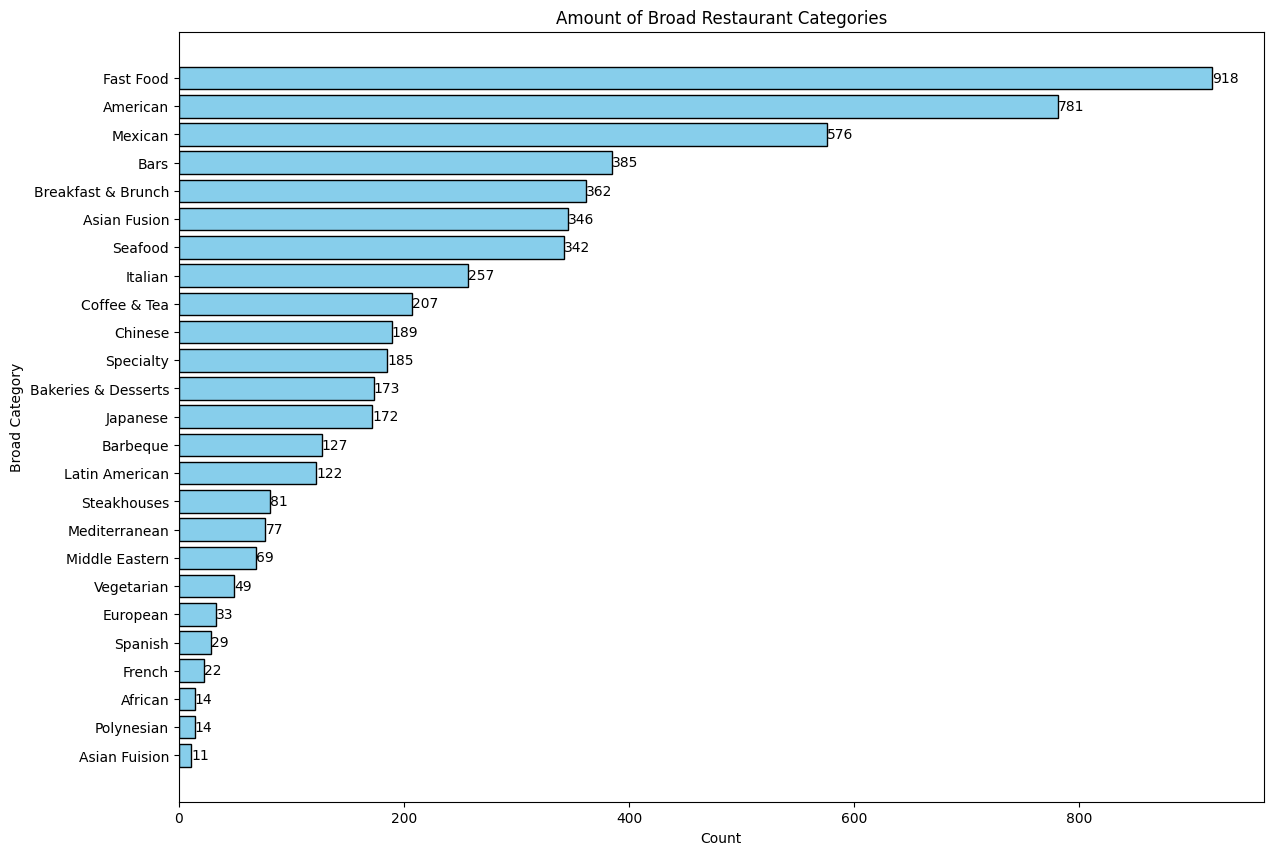

In [ ]:
plot_category(houston_cleaned)

# Review Count

In [ ]:
# Define the review count ranges
review_ranges = {
    '>2000': (2001, float('inf')),
    '1000-2000': (1000, 2000),
    '500-1000': (500, 999),
    # '400-500': (400, 499),
    # '300-400': (300, 399),
    # '200-300': (200, 299),
    '100-500': (100, 499),
    '<100': (0, 99)
}

In [ ]:
# Function to count restaurants in each range
def count_restaurants_in_ranges(df, ranges):
    counts = {}
    for range_name, (low, high) in ranges.items():
        counts[range_name] = df[(df['review_count'] >= low) & (df['review_count'] <= high)].shape[0]
    return counts

In [ ]:
# Calculate average review score for each review count range
def calculate_average_ratings(df, ranges):
    avg_ratings = {}
    for range_name, (low, high) in ranges.items():
        filtered_df = df[(df['review_count'] >= low) & (df['review_count'] <= high)]
        avg_ratings[range_name] = filtered_df['rating'].mean()
    return avg_ratings

In [ ]:
# Calculate the average ratings for each range
average_ratings = calculate_average_ratings(nyc_list, review_ranges)

average_ratings_df = pd.DataFrame.from_dict(average_ratings, orient='index', columns=['Average Rating'])
average_ratings_df

,Average Rating
>2000,4.106612
1000-2000,3.990712
500-1000,3.979144
100-500,3.932419
<100,3.811963


In [ ]:
# Calculate the average ratings for each range for all cities
average_ratings_dict = {}
for city, df in city_dataframes.items():
    average_ratings = calculate_average_ratings(df, review_ranges)
    average_ratings_dict[city] = average_ratings

average_ratings_df = pd.DataFrame(average_ratings_dict) # Create DataFrame from list of Series
display(average_ratings_df.style.background_gradient(cmap='RdYlGn'))

,NYC,LA,Chicago,Houston
>2000,4.106612,4.079048,4.131250,4.200000
1000-2000,3.990712,4.024638,4.002419,4.067347
500-1000,3.979144,4.032918,3.995549,3.998986
100-500,3.932419,4.009220,3.913953,3.923472
<100,3.811963,4.116223,3.738981,3.786671


In [ ]:
average_ratings_dict = {}
for city, df in city_dataframes.items():
    # Assume 'rating' is the column name in df where the ratings are stored
    average_rating = df['rating'].mean()
    average_ratings_dict[city] = average_rating
# Convert the dictionary to a DataFrame
average_ratings_df = pd.DataFrame(list(average_ratings_dict.items()), columns=['City', 'Average Rating'])
# Display the DataFrame
display(average_ratings_df)

,City,Average Rating
0,NYC,3.858668
1,LA,4.059459
2,Chicago,3.820905
3,Houston,3.846516


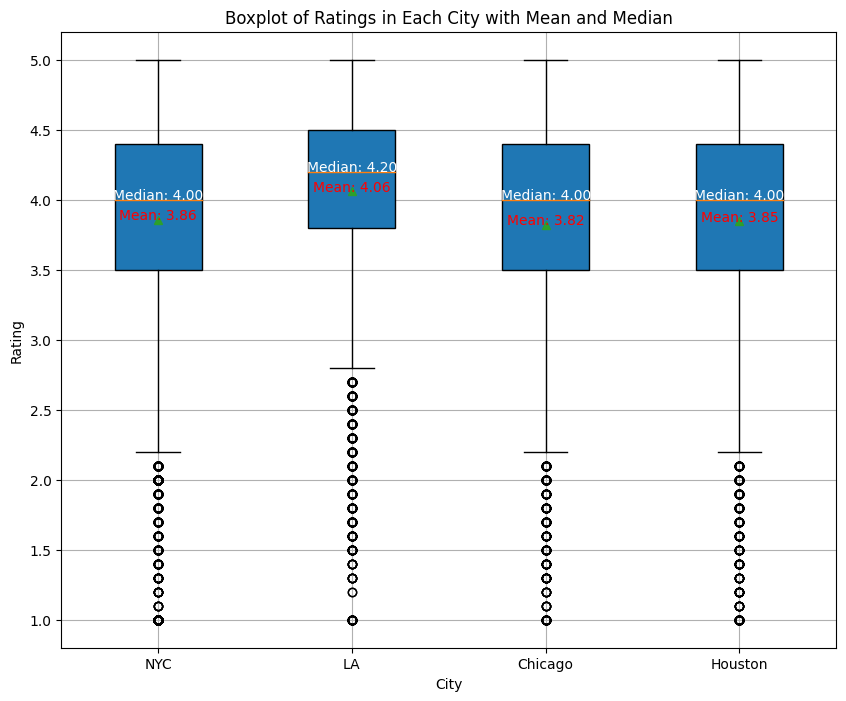

In [ ]:
plt.figure(figsize=(10, 8))

ratings_data = [df['rating'] for df in city_dataframes.values()]
plt.boxplot(ratings_data, labels=city_dataframes.keys(), patch_artist=True, showmeans=True)

# Annotating with mean and median
for i, df in enumerate(city_dataframes.values(), 1):
    mean_rating = df['rating'].mean()
    median_rating = df['rating'].median()

    plt.text(i, mean_rating, f'Mean: {mean_rating:.2f}', horizontalalignment='center', color='red', fontsize=10)
    plt.text(i, median_rating, f'Median: {median_rating:.2f}', horizontalalignment='center', color='white', fontsize=10)

plt.title('Boxplot of Ratings in Each City with Mean and Median')
plt.xlabel('City')
plt.ylabel('Rating')

plt.grid(True)
plt.show()


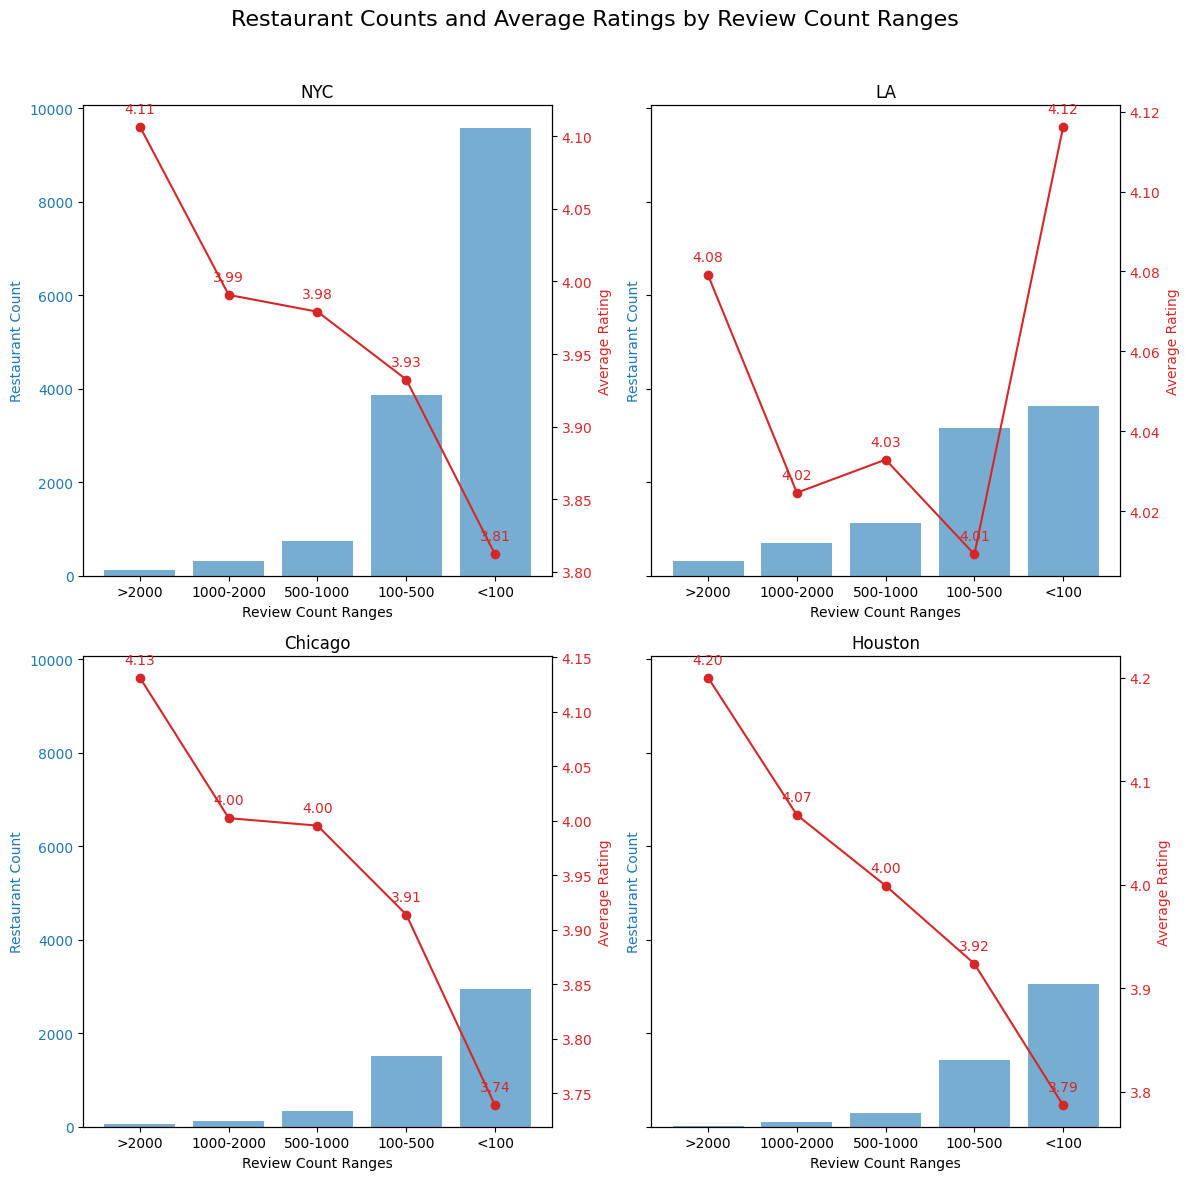

In [ ]:
# Creating subplots for New York and Chicago
# change here according to city list amounts
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 12), sharey=True)

# Function to plot for each city
def plot_city_data(ax, city, df):
    # Calculate the review count ranges and average ratings for each city
    review_counts_city = count_restaurants_in_ranges(df, review_ranges)
    average_ratings_city = calculate_average_ratings(df, review_ranges)

    labels = list(average_ratings_city.keys())
    average_rating_values = list(average_ratings_city.values())
    restaurant_counts = [review_counts_city[label] for label in labels]

    # Bar plot for restaurant counts
    ax.set_xlabel('Review Count Ranges')
    ax.set_ylabel('Restaurant Count', color='tab:blue')
    ax.bar(labels, restaurant_counts, color='tab:blue', alpha=0.6, label='Restaurant Count')
    ax.tick_params(axis='y', labelcolor='tab:blue')

    # Line plot for average ratings
    ax2 = ax.twinx()
    ax2.set_ylabel('Average Rating', color='tab:red')
    ax2.plot(labels, average_rating_values, color='tab:red', marker='o', label='Average Rating')
    ax2.tick_params(axis='y', labelcolor='tab:red')

    # Adding subtitles
    ax.set_title(city)

    # Annotate the average rating points
    for i, value in enumerate(average_rating_values):
        ax2.annotate(f'{value:.2f}', (labels[i], average_rating_values[i]), textcoords="offset points", xytext=(0,10), ha='center', color='tab:red')

# Plot for New York and Chicago
cities = list(city_dataframes.keys()) # Get a list of cities
for i, city in enumerate(cities):
    row = i // 2  # Calculate the row index
    col = i % 2   # Calculate the column index
    plot_city_data(axes[row, col], city, city_dataframes[city]) # Index axes with [row, col]

# Adding an overall title
fig.suptitle('Restaurant Counts and Average Ratings by Review Count Ranges', fontsize=16)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Filter Reviews

In [ ]:
def filter_reviews(df):
    df = df[df['review_count'] > 1000]
    return df

In [ ]:
# Calculate the average ratings for each range for all cities
correlation_dict = {}
for city, df in city_dataframes.items():
    filtered_dataframe = filter_reviews(df).reset_index(drop=True)
    correlation = filtered_dataframe['review_count'].corr(filtered_dataframe['rating'])
    correlation_dict[city] = correlation

correlation = pd.DataFrame.from_dict(correlation_dict, orient='index', columns=['Correlation'])
correlation

,Correlation
NYC,0.118218
LA,0.074689
Chicago,0.192875
Houston,0.221479


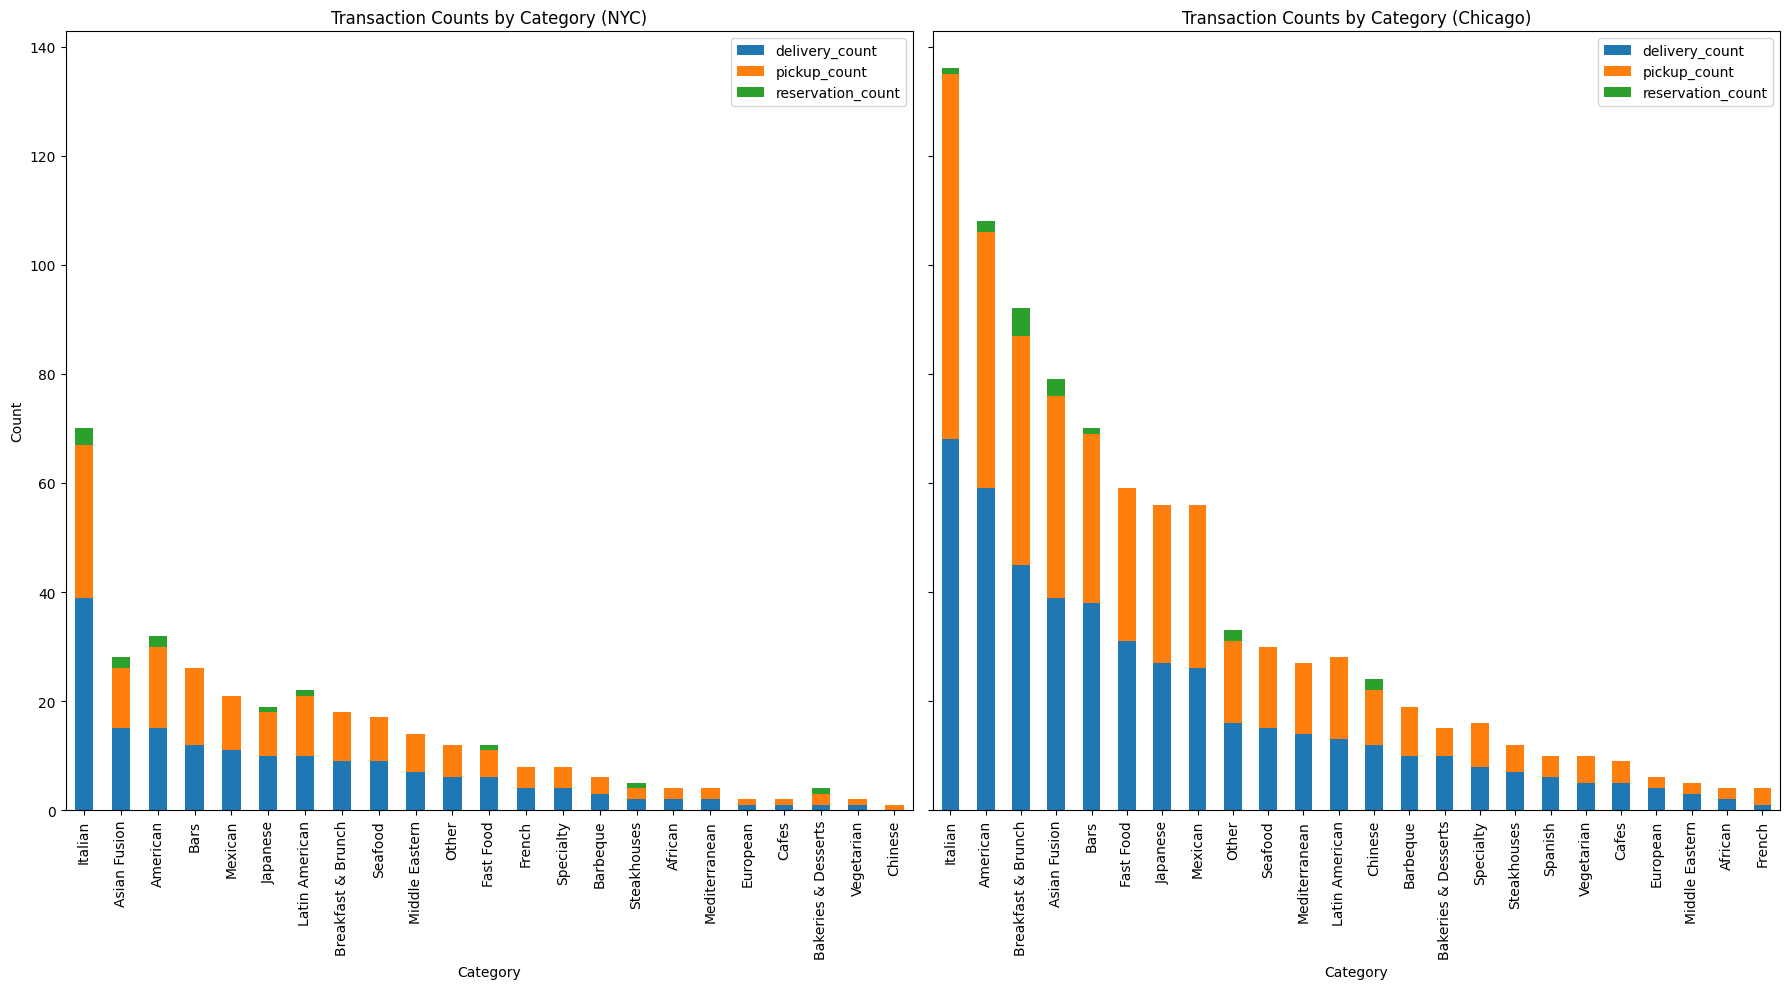

In [ ]:
# Stacked Bar Chart: Transaction Counts by Category
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 10), sharey=True)

# NYC
nyc_aggregated.set_index('mapped_category')[['delivery_count', 'pickup_count', 'reservation_count']].sort_values(by='delivery_count', ascending=False).plot(kind='bar', stacked=True, ax=axes[0])
axes[0].set_title('Transaction Counts by Category (NYC)')
axes[0].set_xlabel('Category')
axes[0].set_ylabel('Count')

# Chicago
chicago_aggregated.set_index('mapped_category')[['delivery_count', 'pickup_count', 'reservation_count']].sort_values(by='delivery_count', ascending=False).plot(kind='bar', stacked=True, ax=axes[1])
axes[1].set_title('Transaction Counts by Category (Chicago)')
axes[1].set_xlabel('Category')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

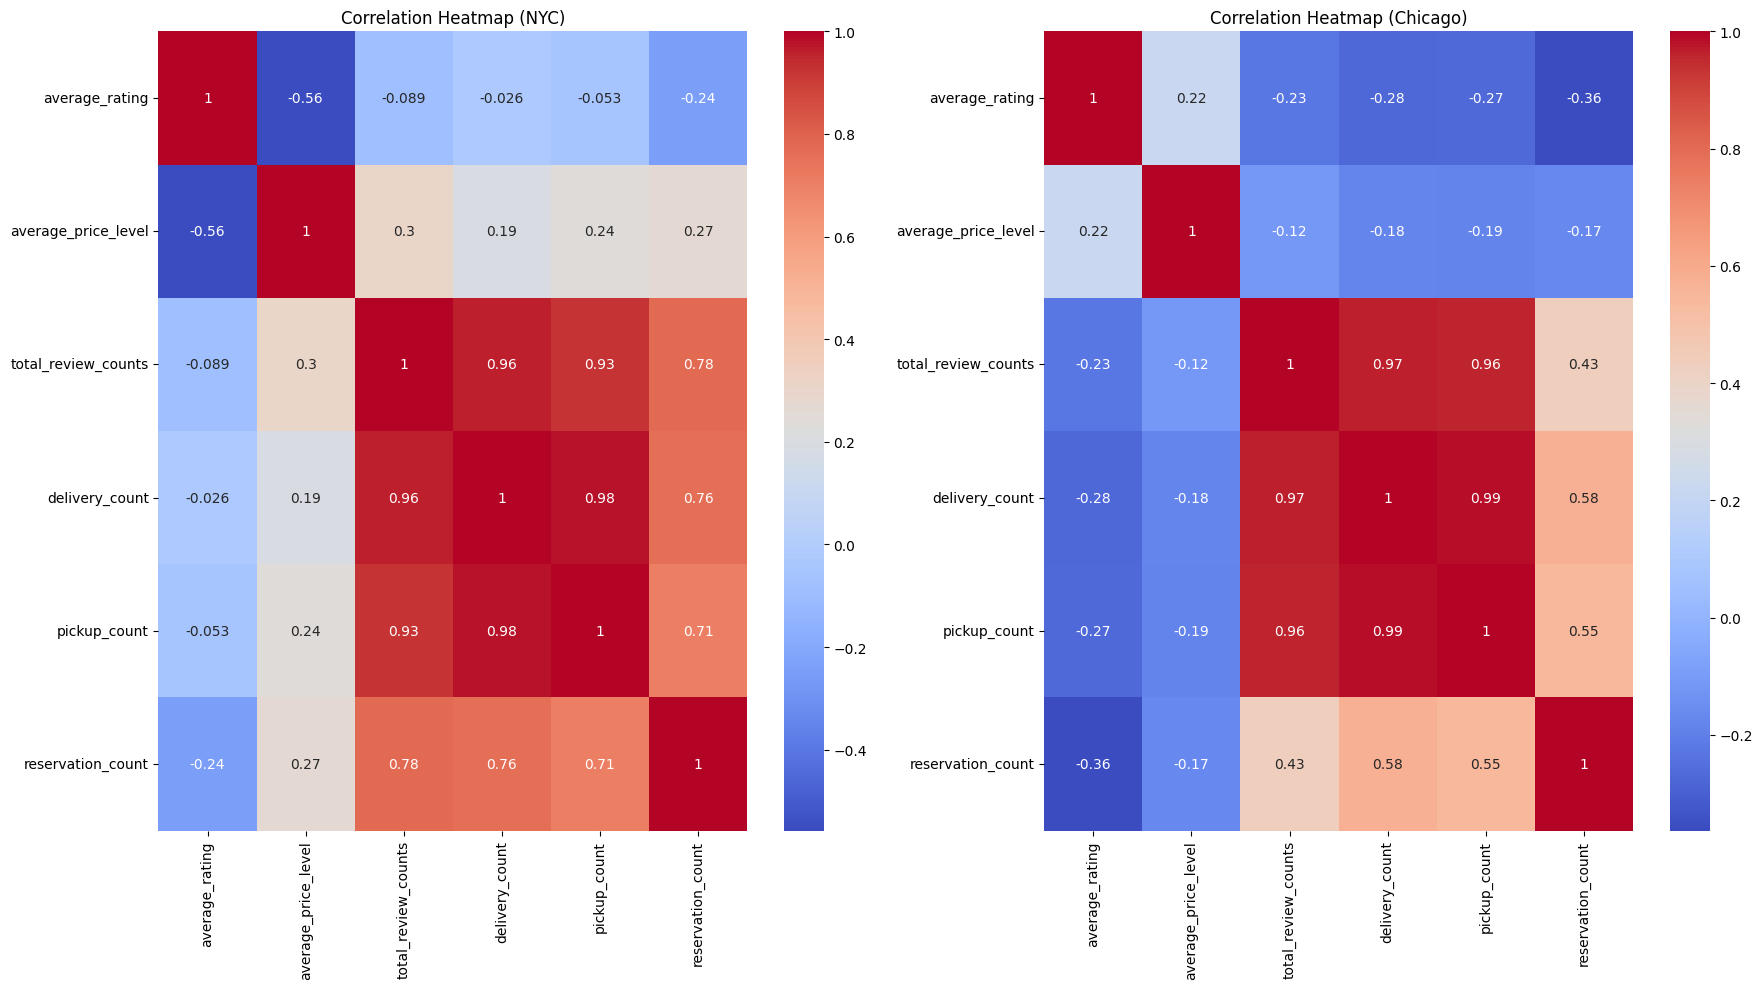

In [ ]:
# Heatmap: Correlation between features
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 10))

# NYC
# Select only numerical columns for correlation calculation
nyc_numerical = nyc_aggregated.select_dtypes(include=['number'])
sns.heatmap(nyc_numerical.corr(), annot=True, cmap='coolwarm', ax=axes[0])
axes[0].set_title('Correlation Heatmap (NYC)')

# Chicago
# Select only numerical columns for correlation calculation
chicago_numerical = chicago_aggregated.select_dtypes(include=['number'])
sns.heatmap(chicago_numerical.corr(), annot=True, cmap='coolwarm', ax=axes[1])
axes[1].set_title('Correlation Heatmap (Chicago)')

plt.tight_layout()
plt.show()

In [ ]:
chicago_aggregated.head()

,mapped_category,average_rating,average_price_level,total_review_counts,delivery_count,pickup_count,reservation_count
0,African,4.200000,2.000000,2173,2,2,0
1,American,4.046774,2.225806,77102,59,47,2
2,Asian Fusion,4.016667,1.952381,46997,39,37,3
3,Bakeries & Desserts,3.900000,1.700000,9027,10,5,0
4,Barbeque,3.872727,2.000000,17727,10,9,0


# correlation

In [ ]:
def transaction_correlation(data):
  transaction_types = ['delivery', 'pickup', 'restaurant_reservation']
  for transaction in transaction_types:
      data[transaction] = data['transactions'].apply(lambda x: transaction in eval(x) if isinstance(x, str) else False).astype(int)

  # Calculating the correlation coefficient between 'rating' and each transaction type
  correlation_delivery = data['rating'].corr(data['delivery'])
  correlation_pickup = data['rating'].corr(data['pickup'])
  correlation_reservation = data['rating'].corr(data['restaurant_reservation'])
  correlations = {
      'Delivery Correlation': [correlation_delivery],
      'Pickup Correlation': [correlation_pickup],
      'Reservation Correlation': [correlation_reservation]
  }
  return pd.DataFrame(correlations)

In [ ]:
correlation_transaction = pd.DataFrame()
for city,df in city_dataframes.items():
  correlation_transaction = pd.concat([transaction_correlation(df), correlation_transaction])
correlation_transaction
#????????????????

,Delivery Correlation,Pickup Correlation,Reservation Correlation
0,0.000785,0.034373,0.009229
0,0.148659,0.103176,0.061914
0,0.037894,-0.015373,0.039012


In [ ]:
# One-hot encode the transaction types
transaction_types = ['delivery', 'pickup', 'restaurant_reservation']
data = nyc_list.copy()
for transaction in transaction_types:
    data[transaction] = data['transactions'].apply(lambda x: transaction in eval(x) if isinstance(x, str) else False).astype(int)

# Calculating the correlation coefficient between 'rating' and each transaction type
correlation_delivery = data['rating'].corr(data['delivery'])
correlation_pickup = data['rating'].corr(data['pickup'])
correlation_reservation = data['rating'].corr(data['restaurant_reservation'])

correlation_delivery, correlation_pickup, correlation_reservation

(0.0378942603294405, -0.015372516083124907, 0.03901186594858481)

In [ ]:
nyc_filtered = filter_reviews(nyc_list).reset_index(drop=True)
data = nyc_filtered.copy()
for transaction in transaction_types:
    data[transaction] = data['transactions'].apply(lambda x: transaction in eval(x) if isinstance(x, str) else False).astype(int)

# Calculating the correlation coefficient between 'rating' and each transaction type
correlation_delivery = data['rating'].corr(data['delivery'])
correlation_pickup = data['rating'].corr(data['pickup'])
correlation_reservation = data['rating'].corr(data['restaurant_reservation'])

correlation_delivery, correlation_pickup, correlation_reservation

(-0.014166600286226638, -0.1224336134736154, 0.06470081695229755)